<a href="https://colab.research.google.com/github/trehansalil/clean_or_no_clean/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2 as cv
from glob import glob

categories = ['clean', 'messy']
raw_dir = {'train': './raw/train', 'val': './raw/val'}
output_dir = './images'
extensions = ('*.jpg', '*.png')


In [ ]:
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [ ]:
def resize(image, img_size = 299):
    h, w, c = image.shape
    cropped = image
    if h < w:
        diff = (w - h) // 2
        cropped = image[:, diff: (diff + h), :]
    elif h > w:
        diff = (h - w) // 2
        cropped = image[diff: (diff + w), :, :]

    h, w, c = cropped.shape
    if h > img_size:    # shrink
        return cv.resize(cropped, (img_size, img_size), interpolation=cv.INTER_AREA)
    elif h < img_size:  # enlarge
        return cv.resize(cropped, (img_size, img_size), interpolation=cv.INTER_CUBIC)
    else:
        return cropped

In [ ]:
for dataset, path in raw_dir.items():
    output_set_dir = os.path.join(output_dir, dataset)
    if not os.path.exists(output_set_dir):
        os.mkdir(output_set_dir)

    for cat in categories:
        output_cat_dir = os.path.join(output_set_dir, cat)
        if not os.path.exists(output_cat_dir):
            os.mkdir(output_cat_dir)

        input_dir = os.path.join(path, cat)
        filenames = list()
        for ext in extensions:
            print(os.path.join(input_dir, ext))
            filenames.extend(glob(os.path.join(input_dir, ext)))

        for i, file in enumerate(filenames):
            print('processing:', file)
            img = cv.imread(file)
            resized = resize(img)
            img_name = str(i) + '.png'
            filepath = os.path.join(output_cat_dir, img_name)
            cv.imwrite(filepath, resized)

./raw/train/clean/*.jpg
./raw/train/clean/*.png
processing: ./raw/train/clean/240_F_629580437_fc9kgoFtMGrGodIU0GRcZrNZpzAuteIp.jpg
processing: ./raw/train/clean/240_F_636126525_j8vSnp0sXg9e1WLRigLA8YX8zMrkTOEu.jpg
processing: ./raw/train/clean/240_F_196997285_5TO5iWGsW4ruIjAPJLbePFnOLyol5OB1.jpg
processing: ./raw/train/clean/240_F_136321570_vdzGyD9wnc618kDmYcLsdsyZJqWUtnZf.jpg
processing: ./raw/train/clean/240_F_49619979_2lyfHBejqIsrgAAQrUXjLZJaFiGbeZWW.jpg
processing: ./raw/train/clean/240_F_217951471_LzKKLeyXZ61bRCCrPYqxwphSOq8oNWLY.jpg
processing: ./raw/train/clean/240_F_461370506_HX1zmYH4dRLPvifCGVgFwLjZ0TO5QyEn.jpg
processing: ./raw/train/clean/240_F_639620917_sB1i01bmQUHqcR7nagr4GVey9J8ESy2j.jpg
processing: ./raw/train/clean/240_F_221509420_5guDmOXwuLKY30dayIl38sMkuCCJpSrl.jpg
./raw/train/messy/*.jpg
./raw/train/messy/*.png
processing: ./raw/train/messy/240_F_676663582_KM213e6b95u4RVNlYJSJKxTeZluIrrA1.jpg
processing: ./raw/train/messy/240_F_660567859_VK2knM8RlK92WMluSilv15a3bQXnK

processing: ./raw/train/messy/240_F_292737061_DpbDurRPiNSpB4lROL98VbgeFAl9tfqw.jpg
processing: ./raw/train/messy/240_F_239446277_oUOsEXCFY4SLuHsmkV22lRxvS35TJQmx.jpg
processing: ./raw/train/messy/240_F_65371097_ufDbBicZy9W2OC5a2imWMnTA4vyxSXBD.jpg
processing: ./raw/train/messy/240_F_1106456_CWGv0EGm9WYZDk6qMFlme1GHn1umfX.jpg
processing: ./raw/train/messy/240_F_667115220_ClfT9KTOe1oGc5A3qgMFlFf6jnqN6eLQ.jpg
./raw/val/clean/*.jpg
./raw/val/clean/*.png
processing: ./raw/val/clean/240_F_336510426_T8r3jTg31kgoyoMGULULyl1iJDCQgIvz.jpg
processing: ./raw/val/clean/240_F_577688677_LdbPdKZquQbRAMNCTW3AefgugpygVvol.jpg
processing: ./raw/val/clean/240_F_221509408_ekUpElITcvwAGKDIanHpIDLuEZ5Jdfy7.jpg
processing: ./raw/val/clean/240_F_712950271_KvoXgEfDnp5RroR3ORkIrGxEZfP5aDT4.jpg
processing: ./raw/val/clean/240_F_333004296_vaaERKXMcpAU4q7GhQKoP3s6YHwkN4n9.jpg
processing: ./raw/val/clean/240_F_95558174_cwyIq9NMleDmHSeZZZwjQdAhHe9MuzsN.jpg
processing: ./raw/val/clean/240_F_124351325_GSNxP0OAkyIlZIIVS

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import os
from glob import glob
import cv2 as cv
import numpy as np

categories = ['clean', 'messy']
data_dir = {'train': '/content/drive/MyDrive/Imagees/images/train', 'val': '/content/drive/MyDrive/Imagees/images/val'}


def load_data():
    """96 images per class in training set, 10 images per class in validation set"""

    x_train = list()
    x_val = list()
    y_train = list()
    y_val = list()

    for dataset, path in data_dir.items():
        for i, cat in enumerate(categories):
            cur_dir = os.path.join(path, cat)
            filenames = glob(os.path.join(cur_dir, '*.png'))
            for file in filenames:
                img = cv.imread(file)
                if dataset == 'train':
                    x_train.append(img)
                    y_train.append(i)
                else:
                    x_val.append(img)
                    y_val.append(i)

    x_train = np.asarray(x_train)
    y_train = np.asarray(y_train)
    x_val = np.asarray(x_val)
    y_val = np.asarray(y_val)

    return (x_train, y_train), (x_val, y_val)


(x_train, y_train), (x_val, y_val) = load_data()

# normalize data
channel_mean = np.mean(x_train, axis=(0, 1, 2))
channel_std = np.std(x_train, axis=(0, 1, 2))

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

for i in range(3):
    x_train[:, :, :, i] = (x_train[:, :, :, i] - channel_mean[i]) / channel_std[i]
    x_val[:, :, :, i] = (x_val[:, :, :, i] - channel_mean[i]) / channel_std[i]


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception, EfficientNetB0, MobileNetV3Large

In [35]:
# define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

augmented_data = x_train.copy()
train_labels = y_train.copy()

# flow in advance, get augmented training data and corresponding labels
for i in range(8):
    for img, label in datagen.flow(x_train, y_train, batch_size=192):
        print(i)
        augmented_data = np.vstack((augmented_data, img))
        print(augmented_data.shape)
        train_labels = np.hstack((train_labels, label))
        print(train_labels.shape)
        break

0
(384, 299, 299, 3)
(384,)
1
(576, 299, 299, 3)
(576,)
2
(768, 299, 299, 3)
(768,)
3
(960, 299, 299, 3)
(960,)
4
(1152, 299, 299, 3)
(1152,)
5
(1344, 299, 299, 3)
(1344,)
6
(1536, 299, 299, 3)
(1536,)
7
(1728, 299, 299, 3)
(1728,)


In [36]:
# pre-trained model to extract features
base_model = Xception(include_top=False, weights='imagenet', pooling='avg')
train_features = base_model.predict(augmented_data)
# save validation features and label
val_features = base_model.predict(x_val)

1/1 [==============================] - 1s 721ms/step


In [37]:
np.savetxt('data/train_features.csv', train_features, fmt='%.5f', delimiter=',')
np.savetxt('data/train_labels.csv', train_labels, fmt='%1d', delimiter=',')


np.savetxt('data/val_features.csv', val_features, fmt='%.5f', delimiter=',')
np.savetxt('data/val_labels.csv', y_val, fmt='%1d', delimiter=',')

In [38]:
import gc
gc.collect()

42949

In [39]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

In [40]:

import matplotlib.pyplot as plt
import numpy as np
import time


epochs = 10
batch_size = 32
iterations = 120     # 192 * 20 / 32
weight_decay = 0.01

# load feature vectors and labels
x_train = np.genfromtxt('data/train_features.csv', dtype=np.float32, delimiter=',')
x_val = np.genfromtxt('data/val_features.csv', dtype=np.float32, delimiter=',')
y_train = np.genfromtxt('data/train_labels.csv', dtype=np.uint8)
y_val = np.genfromtxt('data/val_labels.csv', dtype=np.uint8)

# x_train = train_features
# x_val = val_features

# custom head: one hidden layer.
model = Sequential([
    Dense(10, activation='sigmoid', kernel_regularizer=regularizers.l2(weight_decay)),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(weight_decay))
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# set up callback
cur_time = str(int(time.time()))
cbks = [
    TensorBoard(log_dir='./log/room_' + cur_time),
    ModelCheckpoint('./ckpt/' + cur_time + '_{epoch:02d}-{val_loss:.2f}.hdf5', save_best_only=True)
]

# training
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=False,      # already shuffled during augmentation
    validation_data=(x_val, y_val),
    callbacks=cbks,
    verbose=1
)

Epoch 1/10
54/54 [==============================] - 2s 9ms/step - loss: 0.8375 - accuracy: 0.7095 - val_loss: 0.7004 - val_accuracy: 0.7000
Epoch 2/10
54/54 [==============================] - 0s 4ms/step - loss: 0.5897 - accuracy: 0.8843 - val_loss: 0.5983 - val_accuracy: 0.8000
Epoch 3/10
54/54 [==============================] - 0s 4ms/step - loss: 0.5087 - accuracy: 0.9167 - val_loss: 0.5477 - val_accuracy: 0.8000
Epoch 4/10
54/54 [==============================] - 0s 3ms/step - loss: 0.4686 - accuracy: 0.9306 - val_loss: 0.5184 - val_accuracy: 0.8000
Epoch 5/10
54/54 [==============================] - 0s 4ms/step - loss: 0.4446 - accuracy: 0.9363 - val_loss: 0.4997 - val_accuracy: 0.9000
Epoch 6/10
54/54 [==============================] - 0s 4ms/step - loss: 0.4281 - accuracy: 0.9416 - val_loss: 0.4869 - val_accuracy: 0.9000
Epoch 7/10
54/54 [==============================] - 0s 4ms/step - loss: 0.4158 - accuracy: 0.9433 - val_loss: 0.4777 - val_accuracy: 0.9000
Epoch 8/10
54/54 [==

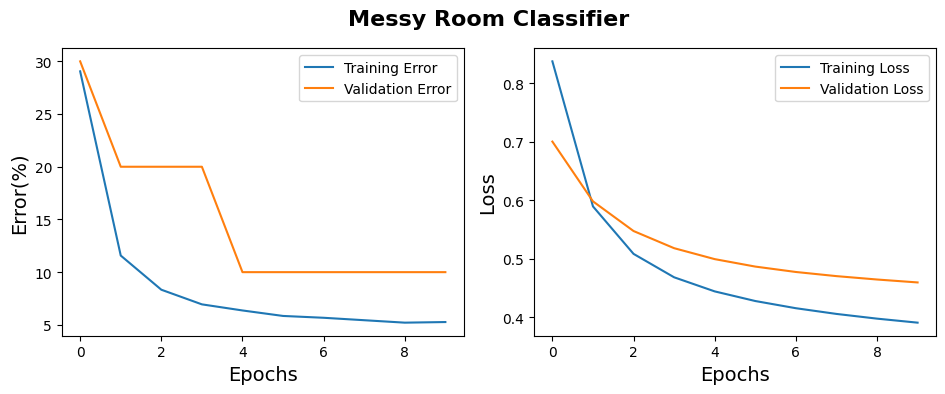

In [41]:
# save and plot result
model.save('./model/room_model_{}.h5'.format(cur_time))

train_error = [(1-acc)*100 for acc in history.history['accuracy']]
val_error = [(1-acc)*100 for acc in history.history['val_accuracy']]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.tight_layout(pad=3, w_pad=2)
fig.suptitle('Messy Room Classifier', fontsize=16, fontweight='bold')
ax1.set_xlabel('Epochs', fontsize=14)
ax1.set_ylabel('Error(%)', fontsize=14)
ax1.plot(train_error, label='Training Error')
ax1.plot(val_error, label='Validation Error')
ax1.legend()

ax2.set_xlabel('Epochs', fontsize=14)
ax2.set_ylabel('Loss', fontsize=14)
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.legend()

plt.savefig('./model/room_model_{}.png'.format(cur_time))